In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

temple_data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Indian Famous Temple EDA\temples.csv")
temple_data.head()

,templeName,Description,Location,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
0,"Badrinath Temple | Badrinath, Uttarakhand",The Badrinath temple also known as Badrinaraya...,Badrinath,"(30.7423302, 79.4930256)",1454.013555,323.309362,1957.065909,1265.717344
1,"Kedarnath Temple | Kedarnath, Uttarakhand",Located at the highest altitude among the Char...,Kedarnath,"(30.7345609, 79.0673204)",1434.105557,295.986734,1958.477211,1294.937834
2,"Gangotri Temple | Gangotri, Uttarakhand",The birthplace of the holy River Ganges is in ...,Gangotri,"(30.9943684, 78.9398699)",1454.357504,312.443007,1988.071223,1323.391443
3,"Yamunotri Temple | Yamunotri, Uttarakhand",Located opposite to Gangotri is the sacred shr...,Yamunotri,"(30.999214, 78.4626951)",1435.376936,290.856707,1992.566060,1357.610477
4,"Har Ki Pauri | Haridwar, Uttarakhand","As one of the oldest living cities of India, H...",Haridwar,"(29.9384473, 78.1452985)",1315.804055,172.720329,1879.124748,1307.563971


In [2]:
temple_data.shape

(53, 8)

In [3]:
temple_data.columns

Index(['templeName', 'Description', 'Location', 'Coordinates',
       'DistanceFromMumbai(Km)', 'DistanceFromNewDelhi(Km)',
       'DistanceFromChennai(Km)', 'DistanceFromKolkata(Km)'],
      dtype='object')

In [4]:
temple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   templeName                53 non-null     object 
 1   Description               53 non-null     object 
 2   Location                  52 non-null     object 
 3   Coordinates               53 non-null     object 
 4   DistanceFromMumbai(Km)    53 non-null     float64
 5   DistanceFromNewDelhi(Km)  53 non-null     float64
 6   DistanceFromChennai(Km)   53 non-null     float64
 7   DistanceFromKolkata(Km)   53 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.4+ KB


In [5]:
temple_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromMumbai(Km),53.0,1195.137153,844.276632,0.000000,851.545156,1158.782925,1405.563660,6345.522996
DistanceFromNewDelhi(Km),53.0,1141.181755,956.735097,0.000000,496.787727,1087.326052,1668.348726,5987.434545
DistanceFromChennai(Km),53.0,1323.089894,1087.565648,52.010385,487.198055,1352.260203,1797.144168,7374.452960
DistanceFromKolkata(Km),53.0,1425.414973,971.889052,0.000000,1294.937834,1464.934193,1671.864818,7275.959203


In [6]:
temple_data.isnull().sum()

templeName                  0
Description                 0
Location                    1
Coordinates                 0
DistanceFromMumbai(Km)      0
DistanceFromNewDelhi(Km)    0
DistanceFromChennai(Km)     0
DistanceFromKolkata(Km)     0
dtype: int64

In [7]:
temple_data = temple_data.dropna()

In [8]:
temple_data.isnull().any().any()

False

In [9]:
temple_data['State']=temple_data['templeName'].str.split(',',expand=True)[1]

In [10]:
temple_data.State.unique()

array([' Uttarakhand', ' Uttar Pradesh', ' Punjab', ' Jammu & Kashmir',
       ' Delhi', ' Himachal Pradesh', ' Orissa', ' West Bengal', ' Assam',
       ' Gujarat', ' Maharashtra', ' Rajasthan', ' Madhya Pradesh',
       ' Andhra Pradesh', ' Karnataka', ' Kerala', ' Tamil Nadu'],
      dtype=object)

In [11]:
temple_data.State.value_counts()

 Tamil Nadu          9
 Uttarakhand         7
 Karnataka           5
 Delhi               4
 Orissa              4
 Jammu & Kashmir     3
 Gujarat             3
 Maharashtra         3
 Rajasthan           3
 West Bengal         2
 Madhya Pradesh      2
 Kerala              2
 Punjab              1
 Himachal Pradesh    1
 Uttar Pradesh       1
 Andhra Pradesh      1
 Assam               1
Name: State, dtype: int64

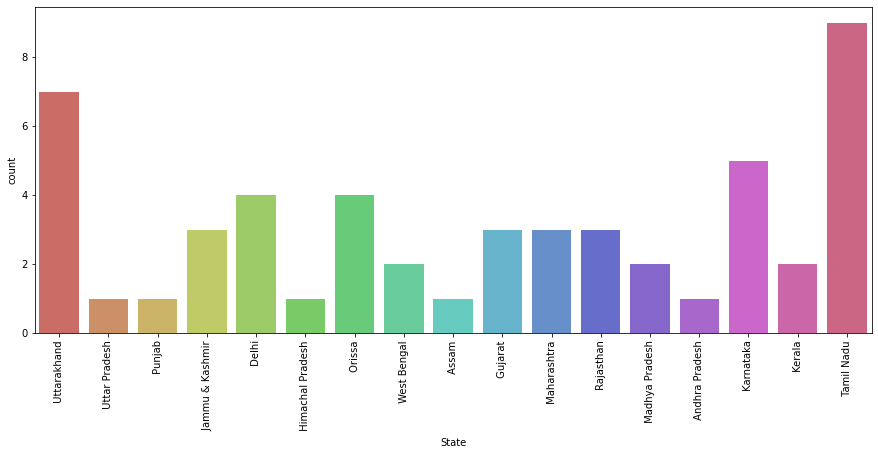

In [12]:
plt.figure(figsize=(15,6))
sns.countplot('State', data = temple_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [13]:
temple_data.Location.unique()

array([' Badrinath', ' Kedarnath', ' Gangotri', ' Yamunotri', ' Haridwar',
       ' Rishikesh', ' Nainital', ' Varanasi', ' Amritsar', ' Pahalgam',
       ' Vaishno Devi', ' Srinagar', ' New Delhi', ' Kangra',
       ' Bhubaneshwar', ' Puri', ' Kolkata', ' Guwahati', ' Dwarka',
       ' Gandhinagar', ' Junagadh', ' Ahmednagar', ' Mumbai', ' Shirdi',
       ' Nathdwara', ' Mount Abu', ' Ranakpur', ' Sanchi', ' Khajuraho',
       ' Tirumala', ' Hampi', ' Mysore', ' Thiruvananthapuram',
       ' Pathanamthitta', ' Srirangam', ' Madurai', ' Rameshwaram',
       ' Mahabalipuram', ' Vellore', ' Thanjavur', ' Belur',
       ' Chidambaram', ' Thiruvannamalai', ' Kanchipuram'], dtype=object)

In [14]:
temple_data.Location.value_counts()

 New Delhi             4
 Hampi                 3
 Bhubaneshwar          3
 Kolkata               2
 Badrinath             1
 Ranakpur              1
 Sanchi                1
 Khajuraho             1
 Tirumala              1
 Mysore                1
 Thiruvananthapuram    1
 Pathanamthitta        1
 Nathdwara             1
 Srirangam             1
 Madurai               1
 Rameshwaram           1
 Mahabalipuram         1
 Vellore               1
 Thanjavur             1
 Belur                 1
 Chidambaram           1
 Thiruvannamalai       1
 Mount Abu             1
 Mumbai                1
 Shirdi                1
 Kedarnath             1
 Gangotri              1
 Yamunotri             1
 Haridwar              1
 Rishikesh             1
 Nainital              1
 Varanasi              1
 Amritsar              1
 Pahalgam              1
 Vaishno Devi          1
 Srinagar              1
 Kangra                1
 Puri                  1
 Guwahati              1
 Dwarka                1


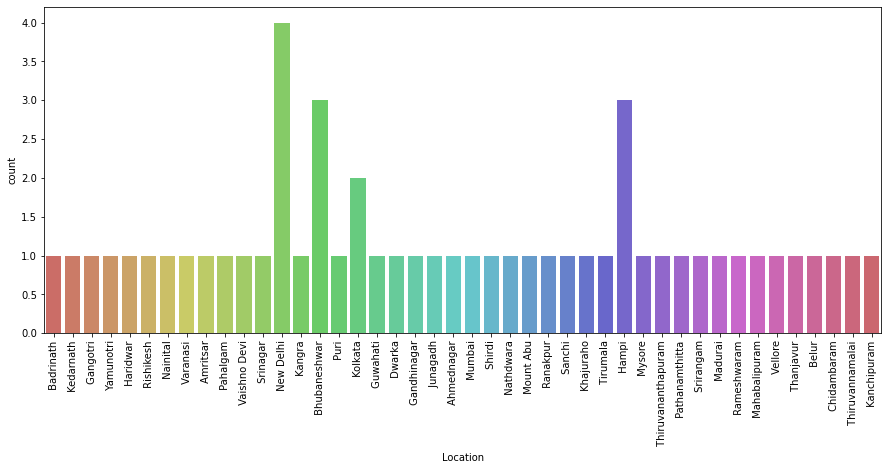

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(temple_data['Location'], data = temple_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [16]:
def temp(city):
    return temple_data.sort_values(by=[city],ignore_index=True).loc[:,['templeName',city]].head(10)

In [17]:
temp('DistanceFromNewDelhi(Km)')

,templeName,DistanceFromNewDelhi(Km)
0,"ISKON Temple | New Delhi, Delhi",0.000000
1,"Birla Mandir | New Delhi, Delhi",0.000000
2,"Akshardham Temple | New Delhi, Delhi",0.000000
3,"Lotus Temple | New Delhi, Delhi",0.000000
4,"Har Ki Pauri | Haridwar, Uttarakhand",172.720329
5,"Neelkanth Mahadev Temple | Rishikesh, Uttarakhand",196.212348
6,"Naina Devi Temple | Nainital, Uttarakhand",227.940519
7,"Yamunotri Temple | Yamunotri, Uttarakhand",290.856707
8,"Kedarnath Temple | Kedarnath, Uttarakhand",295.986734
9,"Gangotri Temple | Gangotri, Uttarakhand",312.443007


In [18]:
temp('DistanceFromMumbai(Km)')

,templeName,DistanceFromMumbai(Km)
0,"Siddhi Vinayak Temple | Mumbai, Maharashtra",0.000000
1,"Shirdi Sai Baba Temple | Shirdi, Maharashtra",184.432488
2,"Shani Shingnapur | Ahmednagar, Maharashtra",208.615647
3,"Somnath Temple | Junagadh, Gujarat",369.551338
4,"Akshardham Temple | Gandhinagar, Gujarat",459.796830
5,"Dwarkadhish Temple | Dwarka, Gujarat",537.226142
6,"Jain Temple | Ranakpur, Rajasthan",550.464049
7,"Vitthala Temple | Hampi, Karnataka",562.648882
8,"Pattabhirama Temple | Hampi, Karnataka",562.648882
9,"Virupaksha Temple | Hampi, Karnataka",562.648882


In [19]:
temp('DistanceFromChennai(Km)')

,templeName,DistanceFromChennai(Km)
0,"Shore Temple | Mahabalipuram, Tamil Nadu",52.010385
1,"Kailashanatha Temple | Kanchipuram, Tamil Nadu",67.117235
2,Tirupati Temple (Tirumala Venkateshwara) | Tir...,119.519574
3,"Sripuram Golden Temple | Vellore, Tamil Nadu",141.417934
4,"Thillai Nataraja Temple | Chidambaram, Tamil Nadu",196.229639
5,"Brihadeshwara Temple | Thanjavur, Tamil Nadu",282.501204
6,"Ranganathaswamy Temple | Srirangam, Tamil Nadu",311.612450
7,"Chamundeshwari Temple | Mysore, Karnataka",401.956211
8,"Meenakshi Temple | Madurai, Tamil Nadu",421.088784
9,"Ramanathaswamy Temple | Rameshwaram, Tamil Nadu",433.071552


In [20]:
temp('DistanceFromKolkata(Km)')

,templeName,DistanceFromKolkata(Km)
0,"Kalighat Kali Temple | Kolkata, West Bengal",0.000000
1,"Dakshineswar Kali Temple | Kolkata, West Bengal",0.000000
2,"Chennakesava Temple | Belur, Karnataka",10.604555
3,"Mukteswar Temple | Bhubaneshwar, Orissa",363.262575
4,"Lingaraj Temple | Bhubaneshwar, Orissa",363.262575
5,"Rajarani Temple | Bhubaneshwar, Orissa",363.262575
6,"Jagannath Temple | Puri, Orissa",400.952315
7,"Kamakhya Temple | Guwahati, Assam",530.247295
8,"Kashi Vishwanath Temple | Varanasi, Uttar Pradesh",626.321884
9,"Khajuraho Temples | Khajuraho, Madhya Pradesh",896.987576
